***
# Experimental Data Analysis (EDA)

In [27]:
sanfrancisco = pd.read_csv("sanfrancisco_prepared.csv")
sanfrancisco.head() 

,date,district,subject_age,subject_race,subject_sex,outcome,contraband_found,search_vehicle,reason_for_stop,reasons_for_stop,no_of_reasons,ageband,raw_outcome,m_v,mnm_v,mpc_v,trafficol,b_a_w,dui_check,assistance
0,2007-01-01,C,56.0,white,male,with valid reason,search not conducted,False,Mechanical or Non-Moving Violation (V.C.),Mechanical or Non-Moving Violation (V.C.),1,adult,citation,True,True,False,False,False,False,False
1,2007-01-01,B,32.0,white,male,with valid reason,search not conducted,False,Moving Violation,Moving Violation,1,adult,citation,True,False,False,False,False,False,False
2,2007-01-01,I,57.0,asian/pacific islander,female,with valid reason,search not conducted,False,Moving Violation,Moving Violation,1,adult,citation,True,False,False,False,False,False,False
3,2007-01-01,A,31.0,hispanic,male,with valid reason,search not conducted,False,Moving Violation,Moving Violation,1,adult,warning,True,False,False,False,False,False,False
4,2007-01-01,J,37.0,hispanic,female,with valid reason,search not conducted,False,Moving Violation,Moving Violation,1,adult,citation,True,False,False,False,False,False,False


## Correlation

In [28]:
jointDf = sanfrancisco[["district", "subject_race", "subject_sex", "outcome", "contraband_found", "search_vehicle", "reason_for_stop", "ageband", "no_of_reasons","m_v","mnm_v","mpc_v","trafficol","b_a_w","dui_check","assistance"]].apply(
        lambda x: x.astype("category") if x.dtype == "object" else x)

jointDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844223 entries, 0 to 844222
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   district          844223 non-null  category
 1   subject_race      844223 non-null  category
 2   subject_sex       844223 non-null  category
 3   outcome           844223 non-null  category
 4   contraband_found  844223 non-null  category
 5   search_vehicle    844223 non-null  bool    
 6   reason_for_stop   844223 non-null  category
 7   ageband           844223 non-null  category
 8   no_of_reasons     844223 non-null  int64   
 9   m_v               844223 non-null  bool    
 10  mnm_v             844223 non-null  bool    
 11  mpc_v             844223 non-null  bool    
 12  trafficol         844223 non-null  bool    
 13  b_a_w             844223 non-null  bool    
 14  dui_check         844223 non-null  bool    
 15  assistance        844223 non-null  bool    
dtypes:

In [29]:
# Correlation Matrix

# Initialize a CramersV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(jointDf)

# It will return a pairwise matrix filled with Cramer's V, where 
# columns and index are the categorical variables of the passed     # pandas.DataFrame
cfit = cramers_v.fit().round(2)
cfit

,district,subject_race,subject_sex,outcome,contraband_found,reason_for_stop,ageband
district,1.00,0.22,0.07,0.06,0.08,0.06,0.06
subject_race,0.22,1.00,0.10,0.09,0.15,0.07,0.07
subject_sex,0.07,0.10,1.00,0.03,0.07,0.03,0.01
outcome,0.06,0.09,0.03,1.00,0.31,0.24,0.02
contraband_found,0.08,0.15,0.07,0.31,1.00,0.08,0.06
reason_for_stop,0.06,0.07,0.03,0.24,0.08,1.00,0.04
ageband,0.06,0.07,0.01,0.02,0.06,0.04,1.00


<AxesSubplot: >

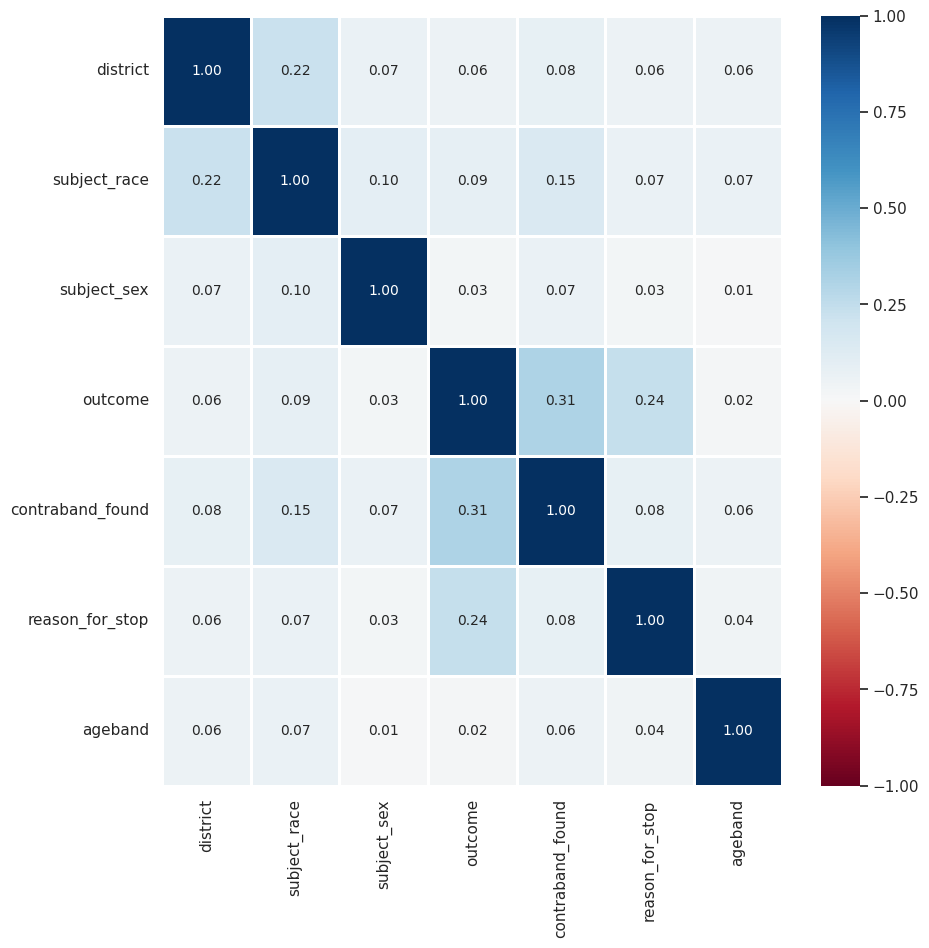

In [30]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 10))
sns.heatmap(cfit, vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# EDA: District

In [31]:
sanfrancisco["district"].unique()

array(['C', 'B', 'I', 'A', 'J', 'E', 'H', 'G', 'F', 'D', 'K', 'S', 'T'],
      dtype=object)

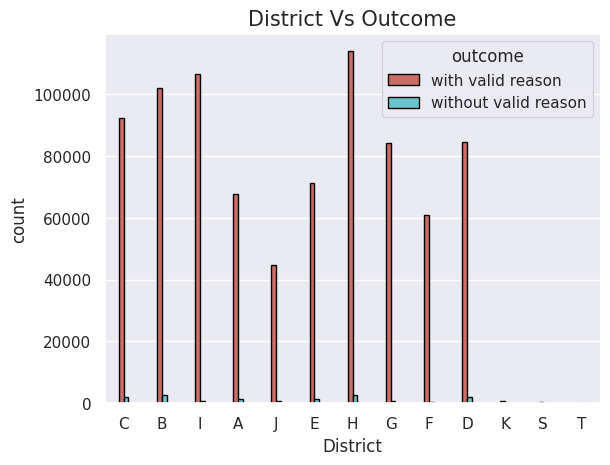

In [32]:
fig, ax = plt.subplots()

sns.countplot(data=sanfrancisco, x="district", hue="outcome", palette="hls", width=0.25, edgecolor="black",  ax=ax)

ax.set_xlabel("District")
ax.set_title("District Vs Outcome", fontsize=15)

plt.show()

In [33]:
# Create a dataframe with the counts by passenger class and survival
counts_df = sanfrancisco.groupby(["district", "outcome"]).size().unstack()

# Divide by the total number and transpose for plotting
district_percents_df = counts_df.div(counts_df.sum())
district_percents_df

outcome,with valid reason,without valid reason
district,,
A,0.081463,0.098871
B,0.123180,0.183971
C,0.111314,0.132402
D,0.102014,0.134261
E,0.086002,0.095153
F,0.073302,0.029813
G,0.101430,0.040622
H,0.137338,0.173575
I,0.128433,0.046819


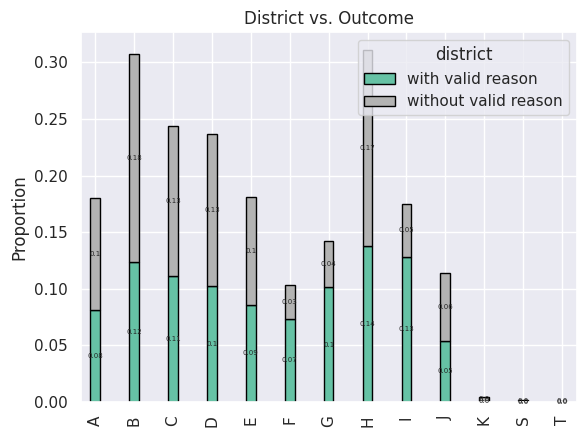

In [34]:
fig, ax = plt.subplots()

stacked_bar = district_percents_df.plot(kind='bar', stacked=True, colormap='Set2', width=0.25, edgecolor="black", ax=ax)

plt.legend(title="district")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("District vs. Outcome")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=5)

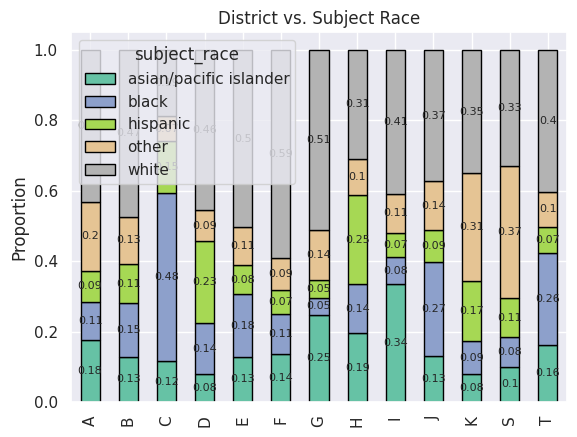

In [35]:
# Create a dataframe with the counts by subject_race and district
counts_df = sanfrancisco.groupby(["subject_race", "district"]).size().unstack()

# Divide by the total number and transpose for plotting
distrace_percents_df = counts_df.div(counts_df.sum()).T
distrace_percents_df

# stop rates by race - number of stops for one race / total number of stops
df_stoprate = pd.DataFrame({"num_people" : sanfrancisco.groupby(["subject_race"]).size()})
df_stoprate["proportion"] = df_stoprate["num_people"]/len(sanfrancisco)
df_stoprate

fig, ax = plt.subplots()

stacked_bar = distrace_percents_df.plot(kind="bar", stacked=True, colormap="Set2", width=0.5, edgecolor="black", ax=ax)

plt.legend(title="subject_race")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("District vs. Subject Race")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

## Comments
For district the data might be too complicated to analyse, and specific trends 

# EDA: Subject Age

### Box plot, Violin plot, Scatter plot

<AxesSubplot: xlabel='outcome', ylabel='subject_age'>

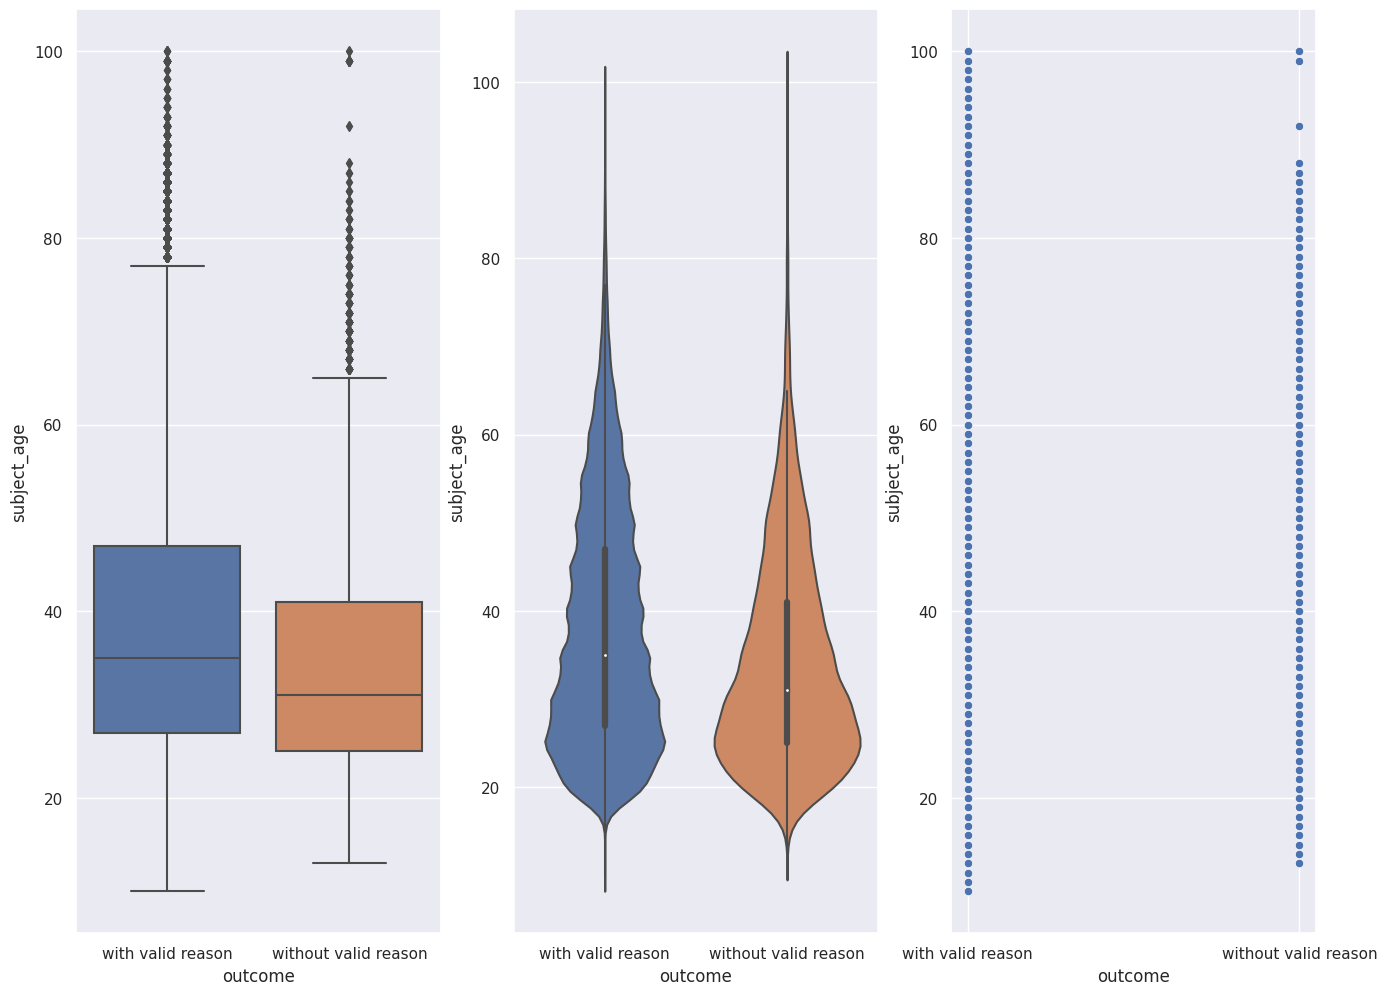

In [36]:
figure, ax = plt.subplots(1, 3, figsize=(16, 12))

sns.boxplot(x = "outcome", y = "subject_age", data = sanfrancisco, orient = "v", ax=ax[0])
# sb.histplot(x = "outcome", y = "subject_age", data = sanfrancisco, ax=ax[1])
sns.violinplot(x = "outcome", y = "subject_age", data = sanfrancisco, ax=ax[1])
sns.scatterplot(x = "outcome", y = "subject_age", data = sanfrancisco, ax=ax[2])

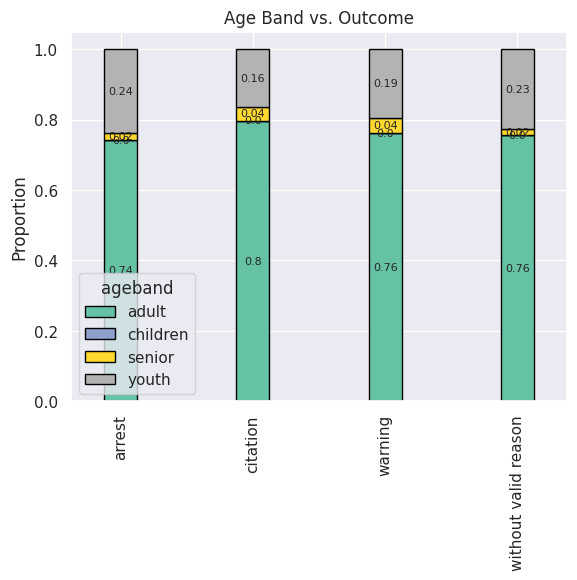

In [37]:
# Create a dataframe with the counts by ageband and raw_outcome
counts_df = sanfrancisco.groupby(["ageband", "raw_outcome"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjrace_percents_df = counts_df.div(counts_df.sum())
sbjrace_percents_df

#race vs no_of_reasons
fig, ax = plt.subplots()

stacked_bar = sbjrace_percents_df.T.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="ageband")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Age Band vs. Outcome")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

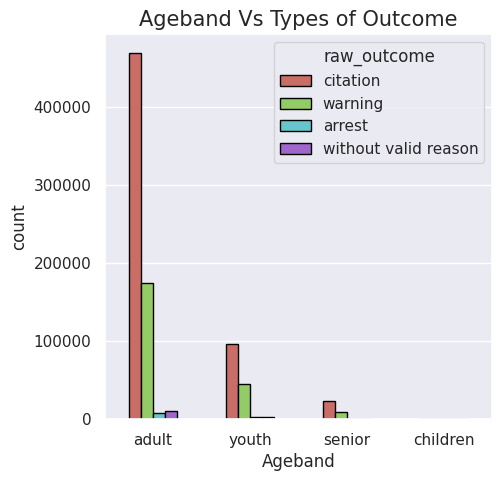

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(data=sanfrancisco, x="ageband", hue="raw_outcome", palette="hls", width=0.5, edgecolor="black",  ax=ax)

ax.set_xlabel("Ageband")
ax.set_title("Ageband Vs Types of Outcome", fontsize=15)

plt.show()

## Comments

Based on the box plot, those that are stopped seems to be of slightly older age. However, the peak seems to be roughly the same. As expected, the violin plot starts to become "thicker" at roughly 16 years old, which is happens to be the minimum legal driving age in San Francisco.

# EDA: Subject Race

Subject Race is one of the variables that we think will have very interesting results, and most of the EDA efforts will be directed here.

### Group bar chart

In [39]:
sanfrancisco["subject_race"].unique()

array(['white', 'asian/pacific islander', 'hispanic', 'black', 'other'],
      dtype=object)

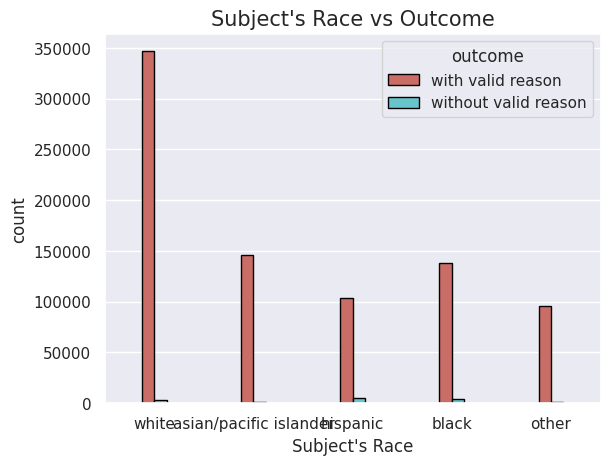

In [40]:
fig, ax = plt.subplots()

sns.countplot(data=sanfrancisco, x="subject_race", hue="outcome", palette="hls", width=0.25, edgecolor="black", ax=ax)

ax.set_xlabel("Subject's Race")
ax.set_title("Subject's Race vs Outcome", fontsize=15)

plt.show()

#### Stacked bar chart

In [41]:
# Create a dataframe with the counts by subject_race and outcome
counts_df = sanfrancisco.groupby(["subject_race", "outcome"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjrace_percents_df = counts_df.div(counts_df.sum())
sbjrace_percents_df

outcome,with valid reason,without valid reason
subject_race,,
asian/pacific islander,0.175676,0.060039
black,0.166275,0.266456
hispanic,0.124437,0.322914
other,0.115654,0.107064
white,0.417959,0.243528


In [42]:
# stop rates by race - number of stops for one race / total number of stops

df_stoprate = pd.DataFrame({"num_people" : sanfrancisco.groupby(["subject_race"]).size()})
df_stoprate["proportion"] = df_stoprate["num_people"]/len(sanfrancisco)
df_stoprate

,num_people,proportion
subject_race,,
asian/pacific islander,146630,0.173686
black,141828,0.167998
hispanic,107935,0.127851
other,97513,0.115506
white,350317,0.414958


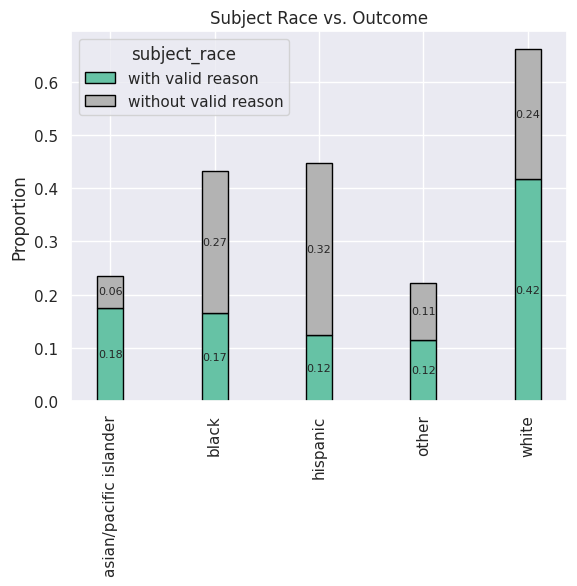

In [43]:
fig, ax = plt.subplots()

stacked_bar = sbjrace_percents_df.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="subject_race")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Subject Race vs. Outcome")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)


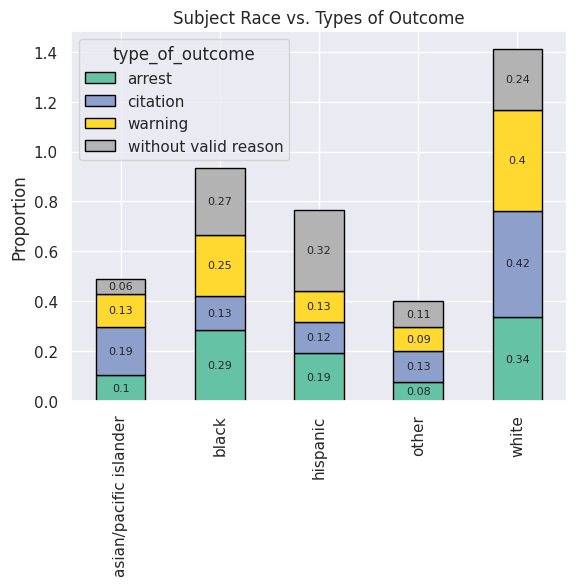

In [44]:
# Create a dataframe with the counts by subject_race and raw_outcome
counts_df = sanfrancisco.groupby(["subject_race", "raw_outcome"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjrace_percents_df = counts_df.div(counts_df.sum()).T
sbjrace_percents_df

# stop rates by race - number of stops for one race / total number of stops

df_stoprate = pd.DataFrame({"num_people" : sanfrancisco.groupby(["subject_race"]).size()})
df_stoprate["proportion"] = df_stoprate["num_people"]/len(sanfrancisco)
df_stoprate

fig, ax = plt.subplots()

stacked_bar = sbjrace_percents_df.T.plot(kind="bar", stacked=True, colormap="Set2", width=0.5, edgecolor="black", ax=ax)

plt.legend(title="type_of_outcome")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Subject Race vs. Types of Outcome")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

In [45]:
# Create a dataframe with the counts by subject_race and no_of_reasons
counts_df = sanfrancisco.groupby(["subject_race", "no_of_reasons"]).size().unstack()
counts_df

no_of_reasons,1,2,3,5
subject_race,,,,
asian/pacific islander,146609.0,20.0,1.0,NaN
black,141800.0,28.0,NaN,NaN
hispanic,107896.0,38.0,1.0,NaN
other,97489.0,22.0,1.0,1.0
white,350234.0,81.0,2.0,NaN


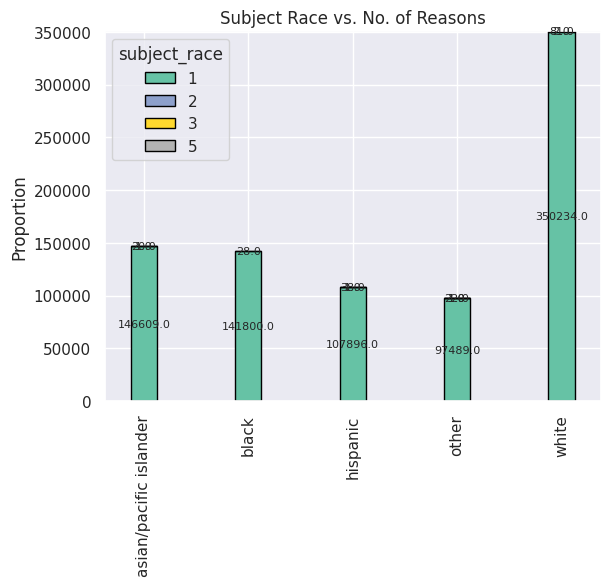

In [46]:
#race vs no_of_reasons

fig, ax = plt.subplots()

stacked_bar = counts_df.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="subject_race")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Subject Race vs. No. of Reasons")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)


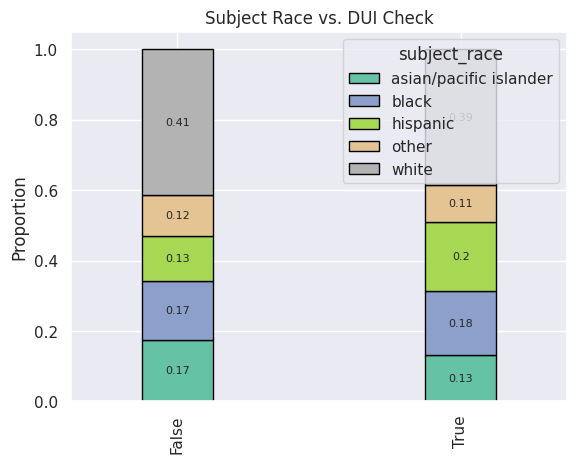

In [47]:
# Create a dataframe with the counts by subject_race and dui_check
counts_df = sanfrancisco.groupby(["subject_race", "dui_check"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjrace_percents_df = counts_df.div(counts_df.sum())
sbjrace_percents_df


#race vs dui_check (ie black vs dui)
fig, ax = plt.subplots()

stacked_bar = sbjrace_percents_df.T.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="subject_race")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Subject Race vs. DUI Check")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)


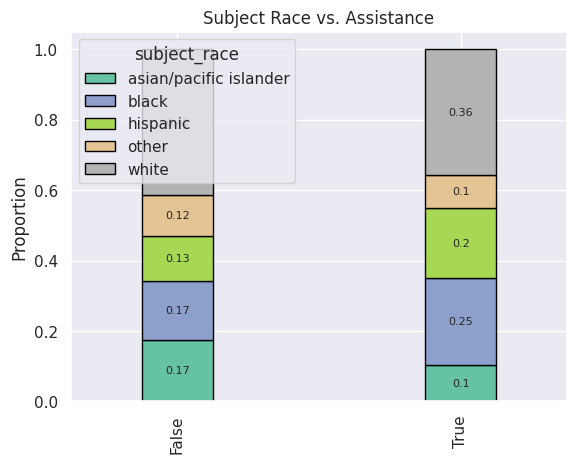

In [48]:
# Create a dataframe with the counts by subject_race and assistance
counts_df = sanfrancisco.groupby(["subject_race", "assistance"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjrace_percents_df = counts_df.div(counts_df.sum())
sbjrace_percents_df


#race vs assistance
fig, ax = plt.subplots()

stacked_bar = sbjrace_percents_df.T.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="subject_race")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Subject Race vs. Assistance")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)


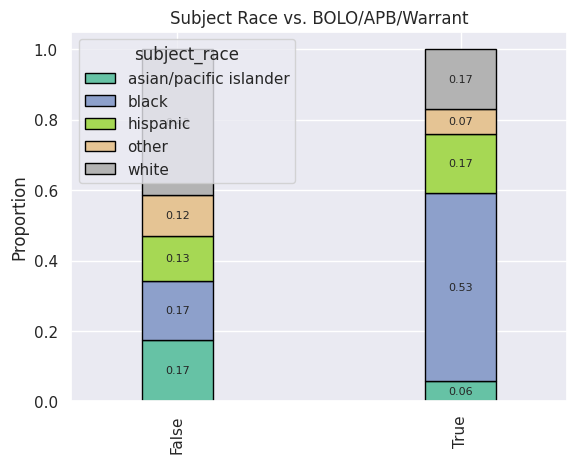

In [49]:
# Create a dataframe with the counts by subject_race and b_a_w
counts_df = sanfrancisco.groupby(["subject_race", "b_a_w"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjrace_percents_df = counts_df.div(counts_df.sum())
sbjrace_percents_df


#race vs b_a_w
fig, ax = plt.subplots()

stacked_bar = sbjrace_percents_df.T.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="subject_race")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Subject Race vs. BOLO/APB/Warrant")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)


## Comments

Based on this chart, there is a clear trend in where blacks and hispanics are being stopped more often without a valid reason.

# Contraband Found VS Outcome

#### Group bar chart

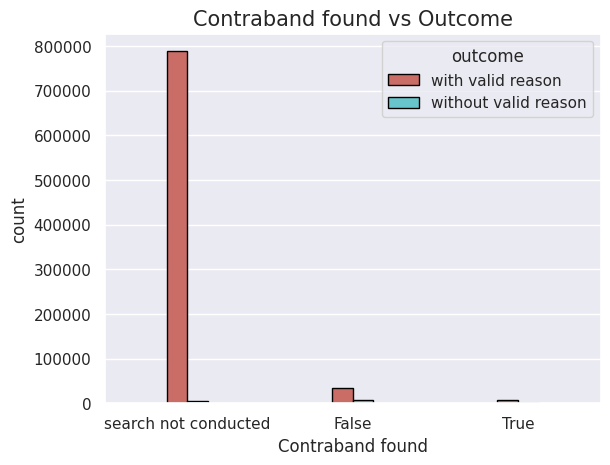

In [50]:
fig, ax = plt.subplots()

sns.countplot(data=sanfrancisco, x="contraband_found", hue="outcome", palette="hls", width=0.25, edgecolor="black", ax=ax)

ax.set_xlabel("Contraband found")
ax.set_title("Contraband found vs Outcome", fontsize=15)

plt.show()

#### Stacked bar chart

In [51]:
# Create a dataframe with the counts by passenger class and survival
counts_df = sanfrancisco.groupby(["contraband_found", "outcome"]).size().unstack()

# Divide by the total number and transpose for plotting
ctbfound_percents_df = counts_df.div(counts_df.sum())
ctbfound_percents_df

outcome,with valid reason,without valid reason
contraband_found,,
False,0.041268,0.564032
True,0.008345,0.016731
search not conducted,0.950387,0.419237


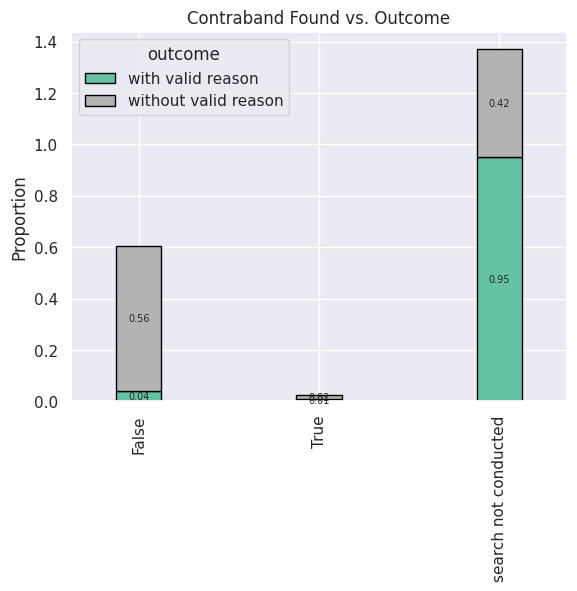

In [52]:
fig, ax = plt.subplots()

stacked_bar = ctbfound_percents_df.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="outcome")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Contraband Found vs. Outcome")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=7)

## Comments

Contrabands are typically quite rare, and even if found, oddly doesn't immediately mean that you will be arrested.

# Bonus EDA: Search vs Race

#### Group bar chart

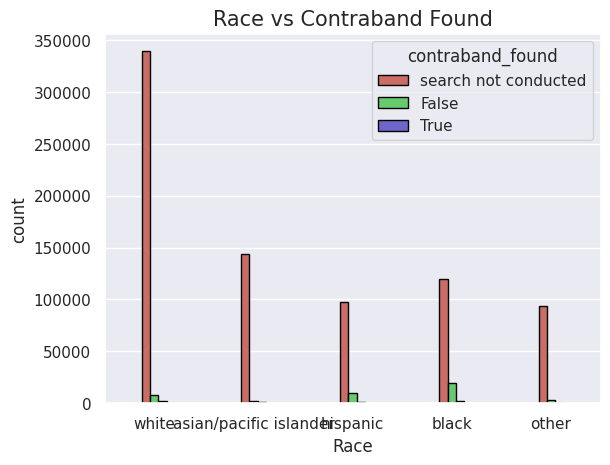

In [53]:
fig, ax = plt.subplots()

sns.countplot(data=sanfrancisco, x="subject_race", hue="contraband_found", palette="hls", width=0.25, edgecolor="black", ax=ax)

ax.set_xlabel("Race")
ax.set_title("Race vs Contraband Found", fontsize=15)

plt.show()

#### Stacked bar chart

In [54]:
# Create a dataframe with the counts by subject_race and contraband_found
counts_df = sanfrancisco.groupby(["subject_race", "contraband_found"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjracesearch_percents_df = counts_df.div(counts_df.sum())
sbjracesearch_percents_df

contraband_found,False,True,search not conducted
subject_race,,,
asian/pacific islander,0.040394,0.130040,0.181198
black,0.464861,0.263430,0.151285
hispanic,0.229756,0.144551,0.122259
other,0.066294,0.096972,0.118301
white,0.198694,0.365006,0.426957


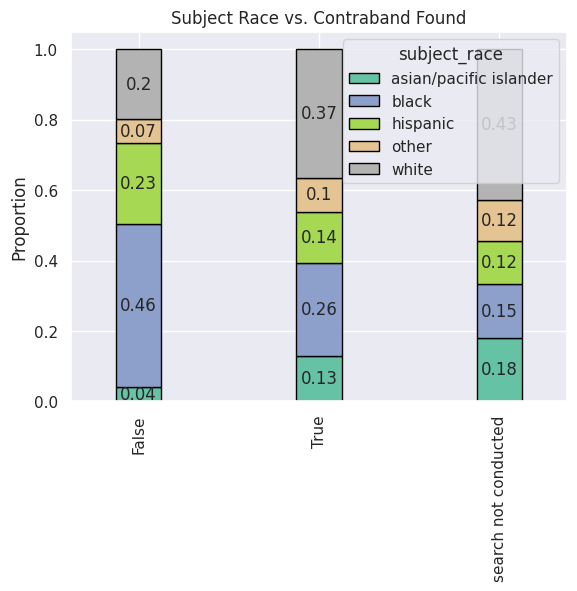

In [55]:
fig, ax = plt.subplots()

stacked_bar = sbjracesearch_percents_df.T.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="subject_race")
plt.xlabel("")
plt.ylabel("Proportion")
plt.title("Subject Race vs. Contraband Found")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12)

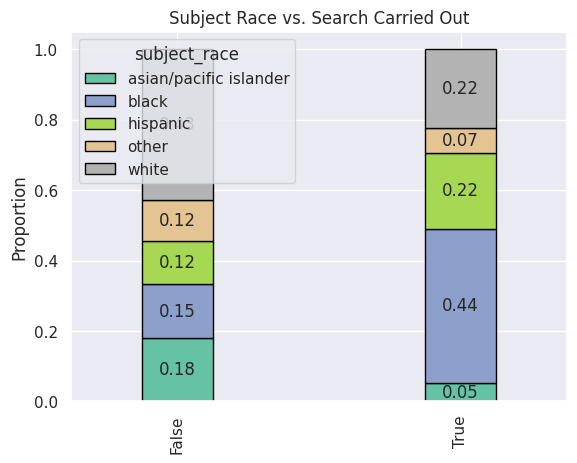

In [56]:
# Create a dataframe with the counts by subject_race and search_vehicle
counts_df = sanfrancisco.groupby(["subject_race", "search_vehicle"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjracesearch_percents_df = counts_df.div(counts_df.sum())
sbjracesearch_percents_df

fig, ax = plt.subplots()

stacked_bar = sbjracesearch_percents_df.T.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="subject_race")
plt.xlabel("")
plt.ylabel("Proportion")
plt.title("Subject Race vs. Search Carried Out")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12)

## Comments
As expected, there is a significant bias in the the stops and well as vehicle search being conducted. From the analysis, it is very clear that those of black and hispanic individuals have a far higher odds of being searched. A shocking proportion of false positives towards black individuals, with them being almost half of the victims.

# Gender vs Outcome

#### Group bar chart

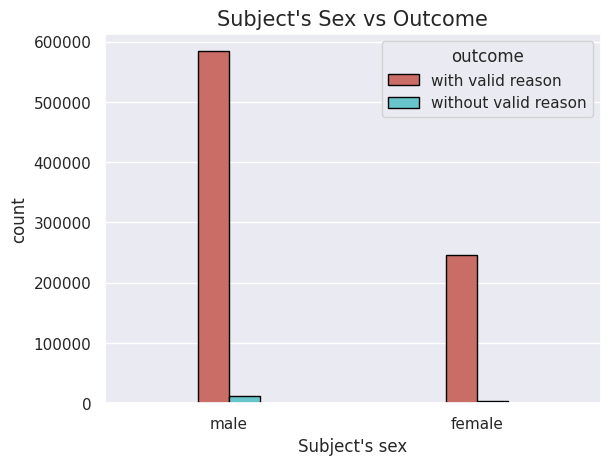

In [57]:
fig, ax = plt.subplots()

sns.countplot(data=sanfrancisco, x="subject_sex", hue="outcome", palette="hls", width=0.25, edgecolor="black", ax=ax)

ax.set_xlabel("Subject's sex")
ax.set_title("Subject's Sex vs Outcome", fontsize=15)

plt.show()

#### Stacked bar chart

In [58]:
# Create a dataframe with the counts by subject_sex and outcome
counts_df = sanfrancisco.groupby(["subject_sex", "outcome"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjsex_percents_df = counts_df.div(counts_df.sum())
sbjsex_percents_df

outcome,with valid reason,without valid reason
subject_sex,,
female,0.296124,0.203181
male,0.703876,0.796819


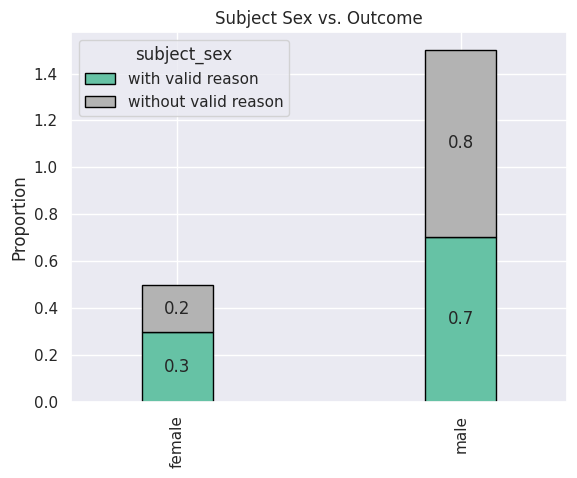

In [59]:
fig, ax = plt.subplots()

stacked_bar = sbjsex_percents_df.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="subject_sex")
plt.xlabel("")
plt.ylabel("Proportion")
plt.title("Subject Sex vs. Outcome")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12)

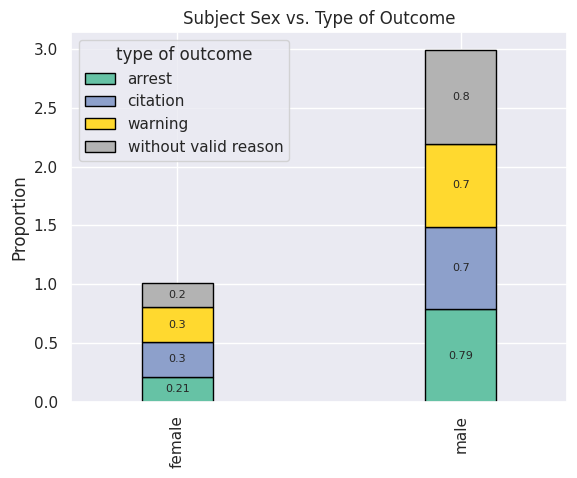

In [60]:
# Create a dataframe with the counts by subject_sex and raw_outcome
counts_df = sanfrancisco.groupby(["subject_sex", "raw_outcome"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjrace_percents_df = counts_df.div(counts_df.sum()).T
sbjrace_percents_df

# stop rates by race - number of stops for one race / total number of stops

df_stoprate = pd.DataFrame({"num_people" : sanfrancisco.groupby(["subject_race"]).size()})
df_stoprate["proportion"] = df_stoprate["num_people"]/len(sanfrancisco)
df_stoprate

fig, ax = plt.subplots()

stacked_bar = sbjrace_percents_df.T.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="type of outcome")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Subject Sex vs. Type of Outcome")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

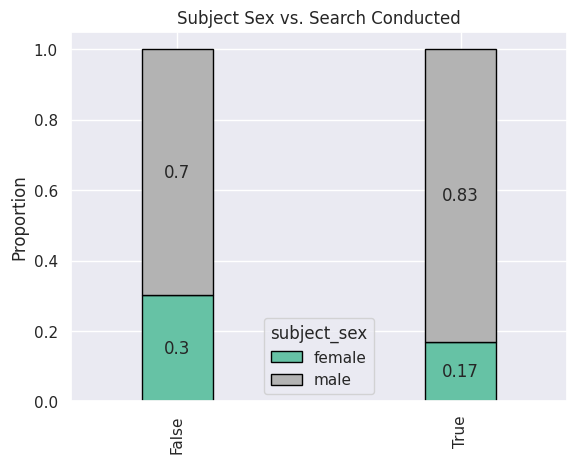

In [61]:
# Create a dataframe with the counts by subject_sex and search_vehicle
counts_df = sanfrancisco.groupby(["subject_sex", "search_vehicle"]).size().unstack()

# Divide by the total number and transpose for plotting
sbjracesearch_percents_df = counts_df.div(counts_df.sum())
sbjracesearch_percents_df

fig, ax = plt.subplots()

stacked_bar = sbjracesearch_percents_df.T.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="subject_sex")
plt.xlabel("")
plt.ylabel("Proportion")
plt.title("Subject Sex vs. Search Conducted")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12)

## Comments

Generally, gender isnt a significant factor that influences your outcome. That being said, males do have a slighly higher chance of being arrested and being searched.


# Search Vehicle VS Outcome

#### Group bar chart

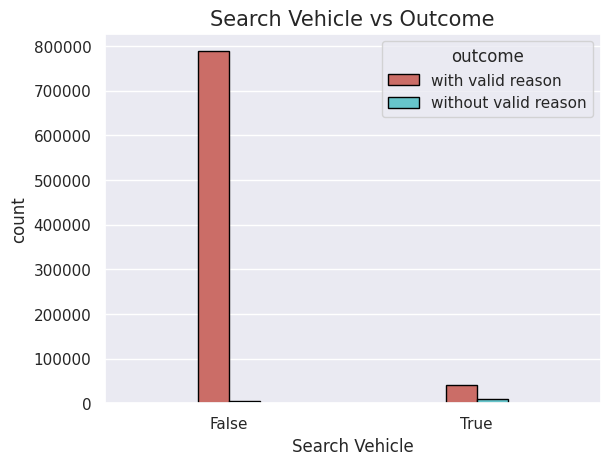

In [62]:
fig, ax = plt.subplots()

sns.countplot(data=sanfrancisco, x="search_vehicle", hue="outcome", palette="hls", width=0.25, edgecolor="black", ax=ax)

ax.set_xlabel("Search Vehicle")
ax.set_title("Search Vehicle vs Outcome", fontsize=15)

plt.show()

#### Stacked bar chart

In [63]:
# Create a dataframe with the counts by search_vehicle and outcome
counts_df = sanfrancisco.groupby(["search_vehicle", "outcome"]).size().unstack()

# Divide by the total number and transpose for plotting
srchvehicle_percents_df = counts_df.div(counts_df.sum())
srchvehicle_percents_df

outcome,with valid reason,without valid reason
search_vehicle,,
False,0.950387,0.419237
True,0.049613,0.580763


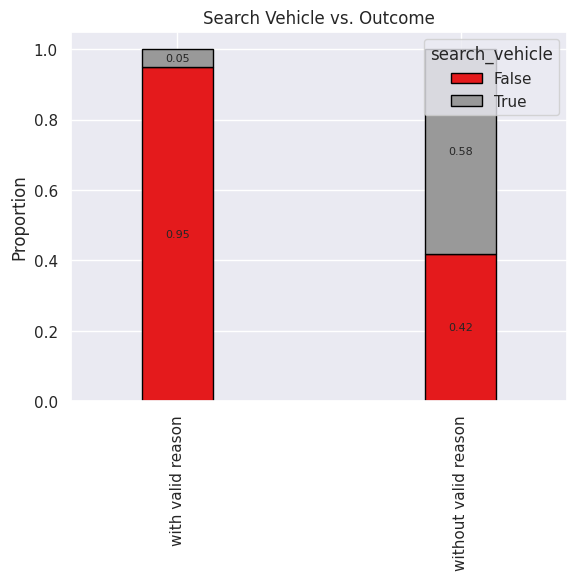

In [64]:
fig, ax = plt.subplots()

stacked_bar = srchvehicle_percents_df.T.plot(kind="bar", stacked=True, colormap="Set1", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="search_vehicle", loc="upper right")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Search Vehicle vs. Outcome")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

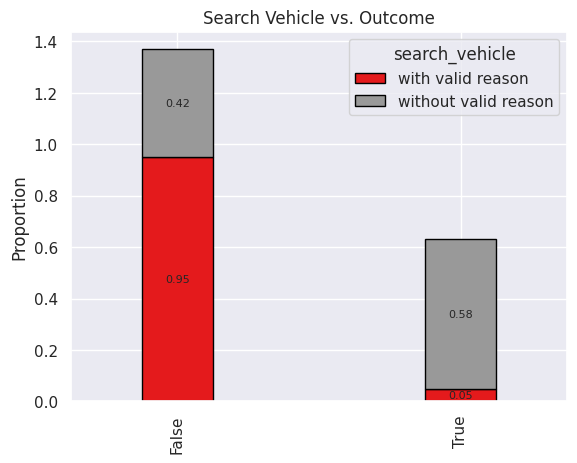

In [65]:
fig, ax = plt.subplots()

stacked_bar = srchvehicle_percents_df.plot(kind="bar", stacked=True, colormap="Set1", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="search_vehicle", loc="upper right")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Search Vehicle vs. Outcome")

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

## Comment

Most stops with valid reasoning do not involve vehicular search(95%). And even if a vehicle search is conducted, a significant proportion of it would still be futile as it doesnt provide a valid reason for the stop. 

# Reason for Stop VS Outcome

#### Group bar chart

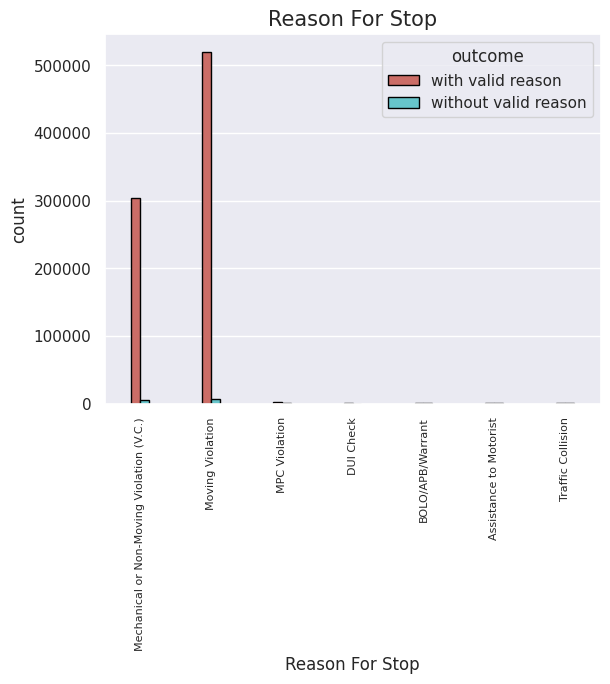

In [66]:
fig, ax = plt.subplots()

sns.countplot(data=sanfrancisco, x="reason_for_stop", hue="outcome", palette="hls", width=0.25, edgecolor="black", ax=ax)

labels = [item.get_text() for item in ax.get_xticklabels()]

ax.set_xticklabels(labels=labels, fontsize=8, rotation="vertical")
ax.set_xlabel("Reason For Stop")
ax.set_title("Reason For Stop", fontsize=15)

plt.show()

#### Stacked bar chart

In [67]:
# Create a dataframe with the counts by reason_for_stop and outcome
counts_df = sanfrancisco.groupby(["reason_for_stop", "outcome"]).size().unstack()

# Divide by the total number and transpose for plotting
reasonfstop_percents_df = counts_df.div(counts_df.sum())
reasonfstop_percents_df

outcome,with valid reason,without valid reason
reason_for_stop,,
Assistance to Motorist,0.000378,0.036354
BOLO/APB/Warrant,0.000698,0.036973
DUI Check,0.001029,0.009639
MPC Violation,0.003154,0.041449
Mechanical or Non-Moving Violation (V.C.),0.366922,0.412283
Moving Violation,0.626892,0.433421
Traffic Collision,0.000926,0.029882


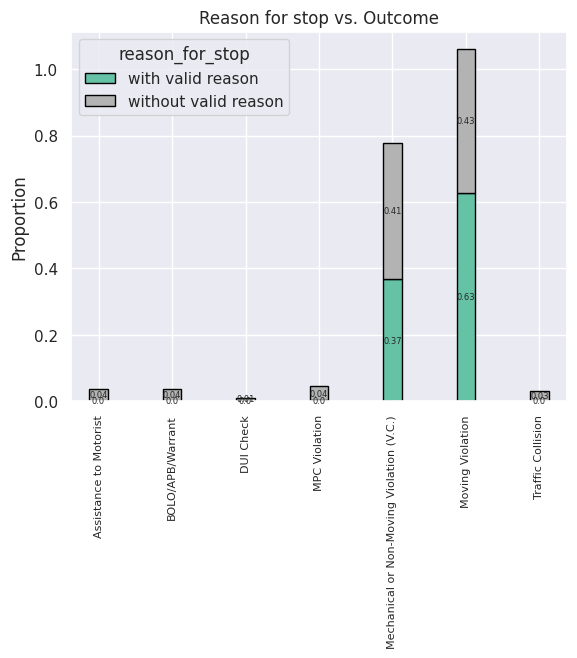

In [68]:
fig, ax = plt.subplots()

stacked_bar = reasonfstop_percents_df.plot(kind="bar", stacked=True, colormap="Set2", width=0.25, edgecolor="black", ax=ax)

plt.legend(title="reason_for_stop", loc="upper left")
plt.xlabel("")
plt.ylabel("Proportion")

plt.title("Reason for stop vs. Outcome")

labels = [item.get_text() for item in ax.get_xticklabels()]

ax.set_xticklabels(labels=labels, fontsize=8)

for c in stacked_bar.containers:

    labels = [np.round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center', fontsize=6)

## Comments
There doesnt seem to be anything useful from Reason for Stop vs Outcome

# Summary of Exploratory Data Analysis(EDA)

There are numerous factors that might influence your odds of being convicted. However, we have found that district is not useful in model building, and thus will be removed. 

Age is fairly interesting as those stopped with valid reasons tend to be slightly older folks, yet the younger folks are the ones being stopped more often. Gender, males specifically, gets stopped more often, and have a higher odds of being searched as well. Regardless, the variable that exhibits the most bias is Race. Blacks and Hispanics have a significantly higher chance of being stopped for a non-valid reason, and if stopped stopped for a valid reason, have a higher chance of being arrested, compared to just being issued a warning or citation. Next, vehicle search isn't directly correlated to being stopped for a valid reason, as most stopped for a valid reason did not get searched at all. In fact, if you are searched, statistically, you actually have a higher chance of being stopped without a valid reason. This is due to the fact that vehicle search is an extremely biased decision.

This realisation led to one of the most intriguing finding --- coming from race vs contraband found. Previously, we mentioned that vehicle search doesn't increase your chances of being caught, however, the nature of vehicle search is that it is almost entirely based on a police officer's gut feeling. In other words, it is a very subjective decision. Hence, there will be a lot of biases that comes into play when deciding to search a vechicle or not. Evident from the EDA of Race vs Contraband Found, almost half of the victims of unsuccessful search are Blacks, showing a huge bias agaisnt Black people that they might have contrabands on them.

In [69]:
# exporting the cleaned data into a csv file
sanfrancisco_export = sanfrancisco.drop(columns=["date", "district", "subject_age", "no_of_reasons", "m_v", "mnm_v", "mpc_v", "trafficol", "b_a_w", "dui_check", "assistance", "reasons_for_stop", "raw_outcome"])

file_path = "./sanfrancisco_cleaned_2.csv"
sanfrancisco_export.to_csv(path_or_buf=file_path, index=False);